In [1]:
import read_files as rf
import pandas as pd
import numpy as np

In [2]:
or_df = rf.file_to_df('U4-1.log')
or_df

,Patente,Hora,Hora_sec
0,AB361IE,00:00:06,6
1,IXR601,00:00:35,35
2,NCD250,00:00:43,43
3,NHI175,00:02:05,125
4,ICE987,00:02:11,131
...,...,...,...
11326,LWS132,23:57:34,86254
11327,BLN132,23:57:35,86255
11328,LGK650,23:58:24,86304
11329,AB892RT,23:58:28,86308


In [3]:
or_filt_df = rf.filtrar_patentes(or_df,300)
or_filt_df.head()

,Patente,Hora,Hora_sec
0,AB361IE,00:00:06,6
1,IXR601,00:00:35,35
2,NCD250,00:00:43,43
3,NHI175,00:02:05,125
4,ICE987,00:02:11,131


In [5]:
des_df = rf.file_to_df('U5-2.log')
des_filt_df = rf.filtrar_patentes(des_df,300)

In [6]:
or_dict, des_dict = rf.get_OD_dict(or_filt_df,des_filt_df)

In [7]:
ttravel_dict = rf.get_ttravel_dict(or_dict,des_dict, 4)

In [8]:
ttravel_df = rf.get_ttravel_df(des_df, ttravel_dict)
ttravel_df.head()

,Patente,Hora,Hora_sec,Tiempo_viaje
0,NCD250,00:03:00,180,2.283333
1,PPW822,00:04:55,295,2.616667
2,AD776SF,00:06:53,413,3.450000
3,AC202UJ,00:07:46,466,2.183333
4,PLL738,00:07:51,471,2.400000


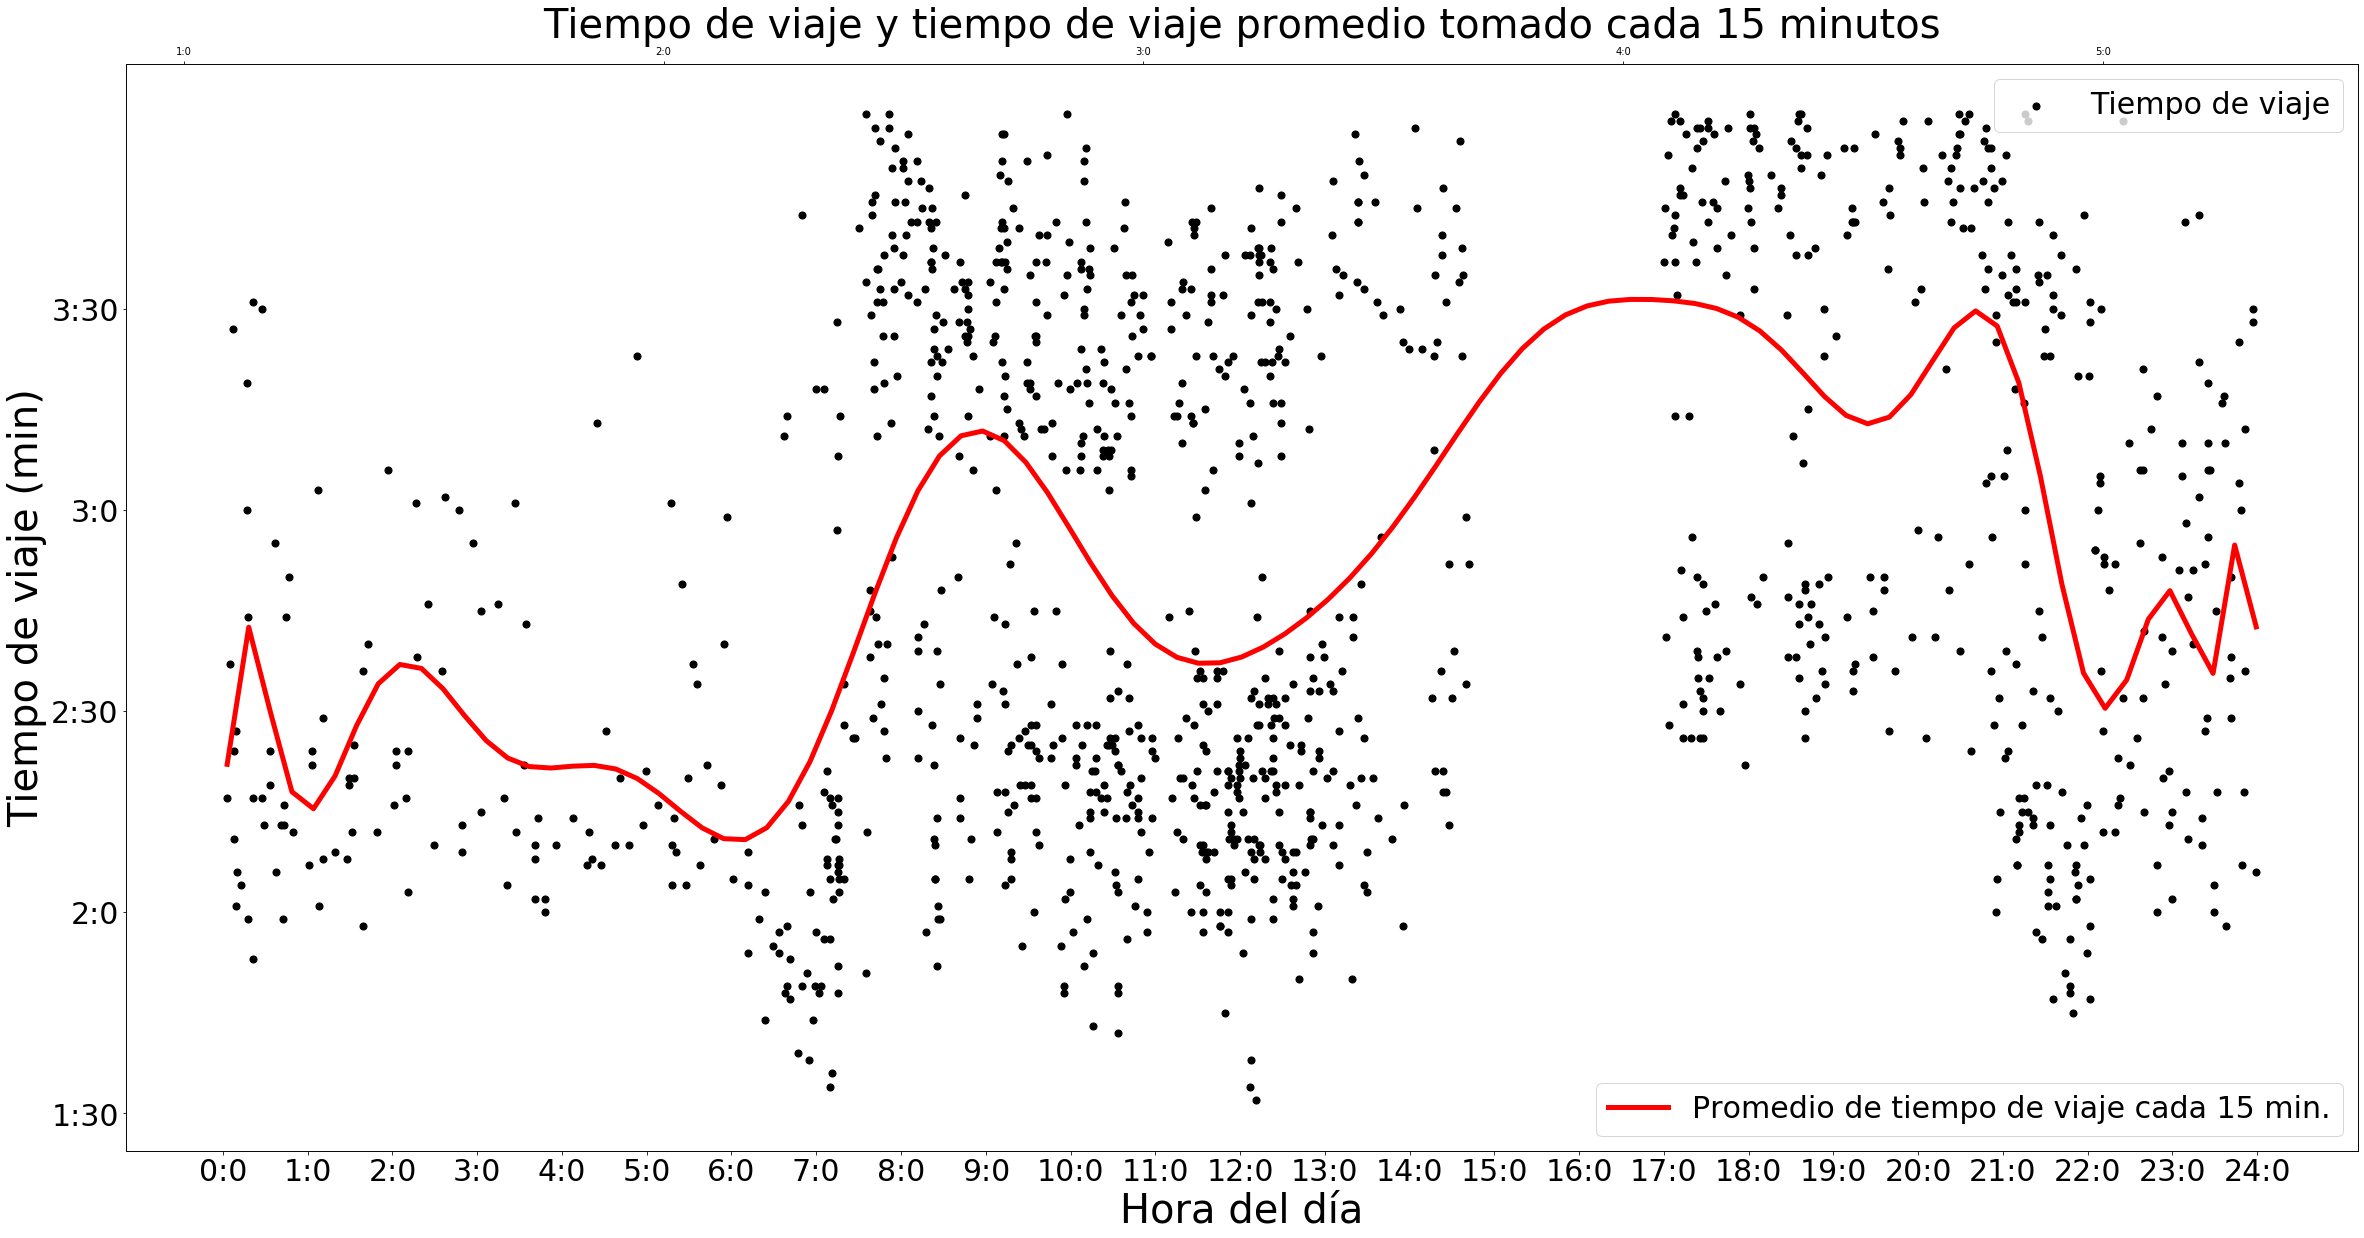

In [9]:
import plotting as plt

xticks, yticks = plt.get_ticks(0,4)
plt.plot_ttravel(ttravel_df, xticks, yticks,(40,20))

In [14]:
ttravel_df

,Patente,Hora,Hora_sec,Tiempo_viaje
0,MXJ248,00:02:53,125,2.016667
1,AD175QM,00:04:51,245,2.066667
2,AC967EW,00:06:52,365,3.050000
3,OUY239,00:07:42,424,2.016667
4,FHJ900,00:07:50,425,2.050000
...,...,...,...,...
947,NVS061,23:51:03,85860,2.966667
948,AB743ZD,23:51:37,85863,3.016667
949,FLE485,23:56:50,86165,3.050000
950,IOP206,23:57:01,86220,3.950000


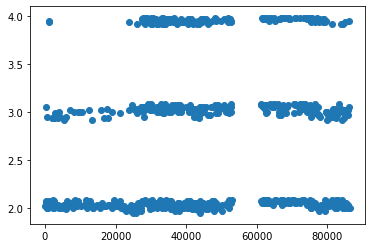

In [15]:
x = ttravel_df['Hora_sec'].values.tolist()
y = ttravel_df['Tiempo_viaje'].values.tolist()

import matplotlib.pyplot as pyplot

pyplot.scatter(x,y)
pyplot.show()

In [27]:
filename = 'U4-1.log'
f = open(filename, "r")
for line in f.readlines()[2:]:
    line_split = line.split(";")
    print(line_split[1].split("=")[1][0:8])

00:00:06
00:00:35
00:00:43
00:02:05
00:02:11
00:02:18
00:02:38
00:03:26
00:03:57
00:04:02
00:05:04
00:05:21
00:05:26
00:05:27
00:05:35
00:05:45
00:05:48
00:06:45
00:06:57
00:07:15
00:07:33
00:07:36
00:08:24
00:08:51
00:10:05
00:10:21
00:10:30
00:10:35
00:10:40
00:10:45
00:11:55
00:12:18
00:13:43
00:13:56
00:14:01
00:14:06
00:15:05
00:15:41
00:16:44
00:17:07
00:17:34
00:17:39
00:18:24
00:18:47
00:18:56
00:19:02
00:19:04
00:19:08
00:20:04
00:20:13
00:20:23
00:21:52
00:22:03
00:23:24
00:23:51
00:24:00
00:24:22
00:25:08
00:25:36
00:27:01
00:27:06
00:27:28
00:27:30
00:28:26
00:29:12
00:29:26
00:30:36
00:30:38
00:30:43
00:31:45
00:31:50
00:32:13
00:33:32
00:33:32
00:33:33
00:33:58
00:34:00
00:34:01
00:34:04
00:35:41
00:35:46
00:37:22
00:38:47
00:38:52
00:40:06
00:40:07
00:40:29
00:40:33
00:40:40
00:40:44
00:40:48
00:40:51
00:42:03
00:42:14
00:42:21
00:43:58
00:45:36
00:47:11
00:47:12
00:48:26
00:48:41
00:50:37
00:50:52
00:52:22
00:53:33
00:55:32
00:55:46
00:57:13
00:58:50
00:58:54
00:59:05
0

In [ ]:
filename = 'U4-1.log'
f = open(filename, "r")
data_patentes = []
data_hora = []
data_hora_sec = []
for line in f.readlines()[2:]:
    line_split = line.split(";")
    data_patentes.append(line_split[4].split("=")[1].strip())
    data_hora.append(line_split[0].split("=")[1][0:8])
    data_hora_sec.append(hr_to_sec(line_split[1].split("=")[1][0:8]))
f.close()
data = data = {'Patente': data_patentes, 'Hora': data_hora, 'Hora_sec': data_hora_sec}
df = pd.DataFrame(data, columns=["Patente", "Hora", "Hora_sec"])
df.drop_duplicates(subset=['Patente', 'Hora_sec'], keep='first', inplace=True)